<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/hw_0515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[과제 _ 개념정리]**

**범위 : 파이썬 머신러닝 완벽가이드 ch5. 1 ~ 5 (4제외) pg. 290 ~ 319(303 ~ 310 제외)**


---

# **Chapter05. 회귀**

## **01. 회귀 소개**

회귀는 현대 통계학을 떠받치고 있는 주요 기둥 중 하나 

* 회귀 : 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칠 
 
 ex) 아파트의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지 모델링하고 예측하는 것 

* 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것 

* 회귀는 회귀 계수의 선현/비선형 여부, 독립 변수의 개수, 종속 변수의 개수에 따라 여러가지 유형으로 나눌 수 있음 
  * 독립변수 개수 : 1개 - 단일 회귀 / 여러개- 다중회귀 
  * 회귀계수의 결합 : 선령 - 선현회귀 / 비선형 - 비선형 회귀 

지도학습은 두가지 유형을 나뉘는데, 바로 **분류**와 **회귀**이다. 

이 두가지 방법의 큰 차이는 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고, 회귀는 연속형 숫자 값이라는 것입니다.

* 여러가지 회귀중에서 선형 회귀가 가장 많이 사용된다. 

* 선형회귀는 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식


<대표적인 선형 회귀 모델>
* 일반 선형 회귀 : 예측값과 실제값의 RSS를 최소화할 수 있도록 회귀계수를 최적화, 규제를 적용하지 않은 모델 
* 릿지 : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델
* 라쏘 : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식, L2 규제가 회귀 계수 값의 크기를 줄이는데 반해 L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 함 
* 엘라스틱넷 : L2, L1 규제를 함께 결합한 모델 
* 로지스틱 회귀 : 분류에 사용되는 선형 모델


## **02. 단순 선형 회귀를 통한 회귀 이해**

단순 선형회귀는 독립변수 하나, 종속변수도 하나인 선형 회귀이다. 

ex) 주택의 크기가 크면 가격이 높아지는 경향이 있기 때문에 다음과 같이 주택 가격은 주택 크기에 대해 선형의 관계로 표현할 수 있다. 

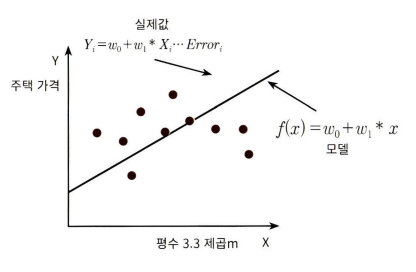

실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 한다. 

최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차 합이 최소가 되는 모델을 만든다는 의미 

=> 보통 오류 합을 계산할 때는 절댓값을 취해서 더하거나, 오류 값의 제곱을 구해서 더하는 방식을 취한다. 

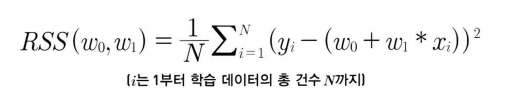

회귀에서 이 RSS는 비용이며 w 변수로 구성되는 RSS를 비용함수라고 한다. 

머신러닝  회귀 알고리즘은 데이터를 계속 학습하면서 이 비용함수가 반환하는 값을 지속해서 감소시키고 최종적으로는 더이상 감소하지 않는 최소의 오류값을 구한다.

## **03. 비용 최소화하기 - 경사 하강법 소개**

w 파라미터가 많은 경우, 고차원 방정식을 동원하더라도 해결하기 어려움 

경사하강법은 고차원 방정식에 대한 문제를 해결해주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식 

* 경사하강법 : '점진적으로' 반복적인 계산을 통해 w 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 w 파라미터를 구하는 방식
* 경사하강법의 핵심은 어떻게 하면 오류가 작아지는 방향으로 w 값을 보정할 수 있을지. 

* y=4X+6 만들기

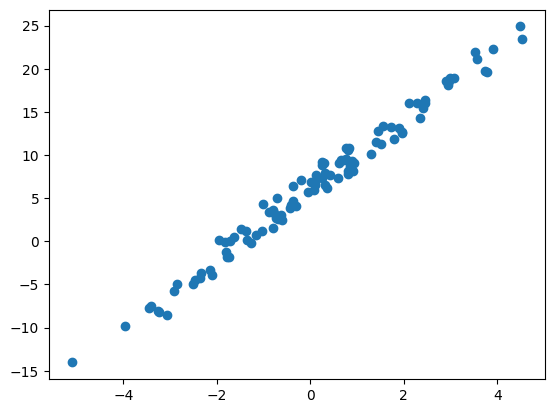

In [1]:
# 경사 하강법
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

#y=4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X=2*np.random.randn(100,1)
y=6+4*X+np.random.randn(100,1)

#X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

=> 데이터가 무작위로 퍼져있음

* 비용함수 정의

 실제 y 값과 예측된 y 값을 인자로 받아서 계산

In [2]:
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

* 경사하강법 함수 

In [3]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N=len(y)
  #w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X, w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))
  #w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

* 경사 하강 방식으로 반복적으로 수행하는 한수

In [4]:
# 입력 인자 inters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
  #w0와 w1을 모두 0으로 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update=get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  
  return w1, w0

* 최종적으로 예측값과 실제값의 RSS차이를 계산하는 함수

In [5]:
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1, w0=gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.057 w0:6.075
Gradient Descent Total Cost:1.0572


=> y=4X+6과 유사하게 w1:4.057 w0:6.075가 도출됨

* 회귀선 그리기

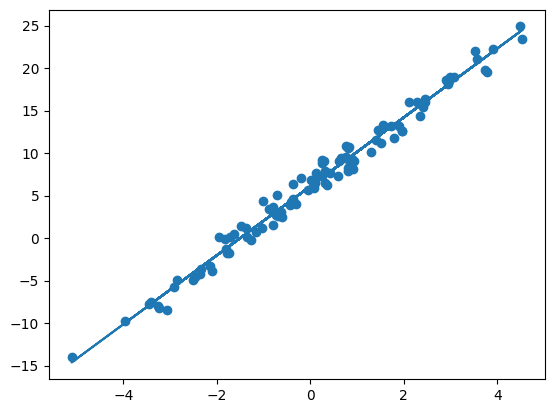

In [6]:
#y_pred에 기반해 회귀선 그리기
plt.scatter(X,y)
plt.plot(X, y_pred)

* 확률적 경사 하강법 

 경사하강법은 모든 학습데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다.

 => 실전에서는 확률적 경사하강법을 사용 

* 확률적 경사 하강법은 일부 데이터만 이용해 W가 업데이트 되는 값을 계산하므로 경사 하강법에 비해 빠른 속도를 보장

* 확률적 경사 하강법 함수 만들기

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0
  
  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  return w1, w0

* 예측 오류 비용 계산

In [8]:
#w1, w0 및 예측 오류 비용 계산
w1, w0=stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000)
print('w1: ', round(w1[0,0], 3), 'w0:', round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.072 w0: 6.064
Stochastic Gradient Descent Total Cost:1.0582


=> 위의 경사 하강법으로 구한 w1,w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용보다 아주 조금 높을 뿐으로 예측 성능상의 큰 차이가 없음

## **05. 다항 회귀와 과(대)적합 / 과소적합의 이해**

### 1) 다항 회귀 이해 

다항 회귀란 독립 변수의 단항식이 아닌 2,3차 방정식과 같은 다항시긍로 표현되는 것을 다항 회귀라고 한다. 

다항 회귀는 선형 회귀임 

=> 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처: \n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


=> 단항 계수 피쳐 [x1,x2]를 2차 다항 계수 [1,x1,x2,x1^2, x1x2,x2^2]으로 변경하므로 첫번째 입력 단항 계수 피쳐 [x1=0,x2=1]은 [1,x1=0,x1^2=0, x1x2=0, x2^2=0] 형태인 [1,0,1,0,0,1]으로 변환됨

* 3차 다항 회귀함수식

In [13]:
# 피처 값이 입력되면 결정 값 반환하는 함수
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [14]:
#3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

#LinearRegression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


* 사이킷런의 Pineline 객체를 이용해 한번에 다항 회귀를 구현

In [15]:
# 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 더 명료한 코드 작성법
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 2) 다항 회귀를 이용한 과소적합 및 과적합의 이해

다항 회귀의 차수를 높일 수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 정확도가 떨어진다.

* 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터 
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1
     

* 다항식의 차수를 1,4,15로 변경


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


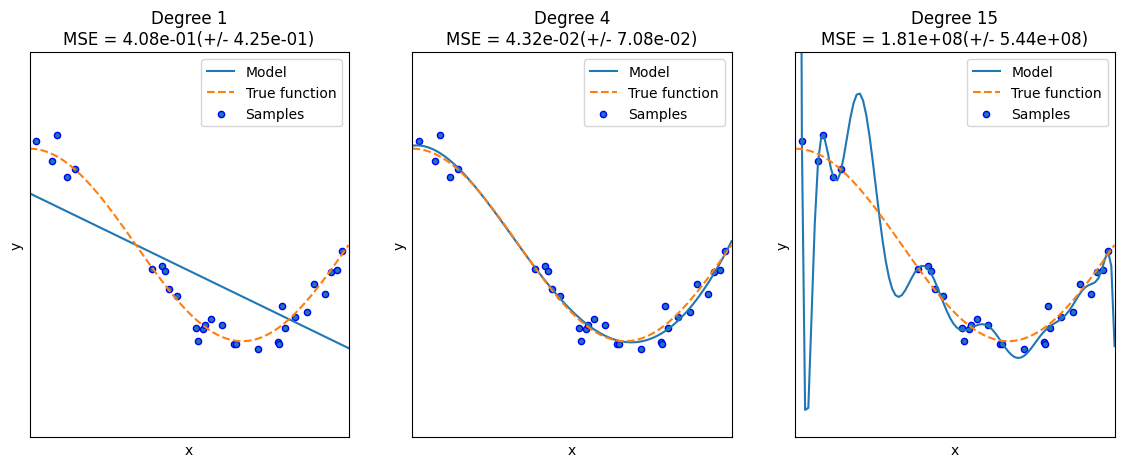

In [18]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교 
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

=> 실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선

=> 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선 



* 맨 왼쪽의 degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 같다. 
* 가운데 degree 4인 예측 곡선은 실제 데이터 세트와 유사한 모습이며 가장 뛰어난 예측 성능을 나타낸다. 
* 맨 오른쪽의 예측 곡선은 어처구니 없을 정도로 MSE가 큼

### 3) 편향-분산 트레이드 오프 

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음. 즉 편향이 높으면 분산은 낮아지고(과소적합), 반대로 분산이 높으면 편향은 낮아진다.(과적합)

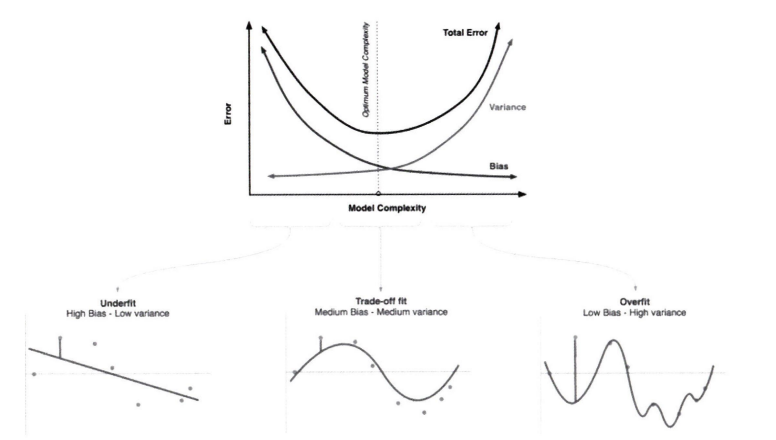